**THIS NOTEBOOK CONTAINS PAYMENT AMOUNT FORECAST FOR SELLER_6 WITH TRANSACTION DATE.**

In [1]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

In [3]:
seller_count=payment.groupby("SellerId").BuyerId.count()

In [4]:
seller_count

SellerId
1         3
2       597
3        96
5      1560
6        32
8      1541
9      2742
10    18020
11     3944
12     6853
13      645
14     2463
15     4008
16      948
17      539
18     1641
19        2
20     2271
Name: BuyerId, dtype: int64

In [5]:
payment.head(30)

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount
0,2017-06-30,2017-07-19,87531,13,16140,74970.0
1,2017-06-30,2017-07-19,87531,13,16140,109841.0
2,2017-06-30,2017-07-19,87531,13,16140,51128.0
3,2017-06-30,2017-07-19,87531,13,16140,74630.0
4,2017-06-30,2017-07-19,87531,13,16140,299030.0
5,2017-06-30,2017-07-24,87531,13,16140,492469.0
6,2017-06-16,2017-07-25,87531,13,16147,276100.0
7,2017-07-28,2017-07-31,87531,13,16136,95175.0
8,2017-07-28,2017-08-02,87531,13,16146,128400.0
9,2016-04-30,2017-08-02,87531,10,15066,NaN


**FORECAST WITHOUT INTERPOLATION**

In [6]:
sel=payment[payment.SellerId==6][["TransactionDate","Amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

In [7]:
ts.tail(2)

TransactionDate
2019-04-30    16455700
2019-05-31     1500000
Freq: M, Name: Amount, dtype: int64

In [8]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [9]:
dft(ts)

Results of Dickey-Fuller Test:
Test Statistic                -0.973628
p-value                        0.762761
#Lags Used                     3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [10]:
ts.min()

600000

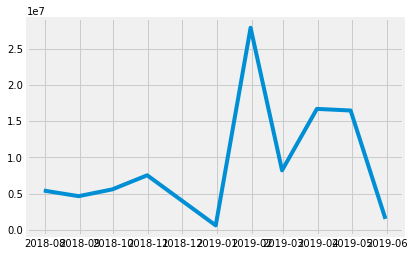

In [12]:
plt.plot(ts)

In [13]:
ts_log=np.log(ts[ts>0])

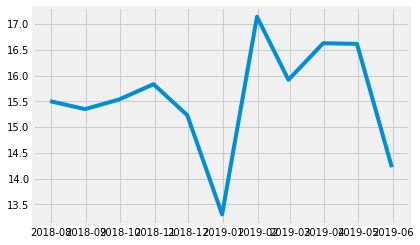

In [14]:
plt.plot(ts_log)

In [15]:
dft(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      7.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [19]:
ts_log_diff1=ts_log-ts_log.shift()

In [20]:
ts_log_diff1.dropna(inplace=True)

In [21]:
dft(ts_log_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      6.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [22]:
ts_log_diff2=ts_log_diff1-ts_log_diff1.shift()

In [23]:
ts_log_diff2.dropna(inplace=True)

In [24]:
dft(ts_log_diff2)

Results of Dickey-Fuller Test:
Test Statistic                -5.321104
p-value                        0.000005
#Lags Used                     0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [1043]:
ts_log_diff2.dropna(inplace=True)

In [1044]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [1045]:
lag_acf = acf(ts_log_diff2, nlags=2)
lag_pacf = pacf(ts_log_diff2, nlags=2, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

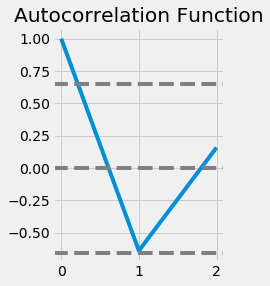

In [1046]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

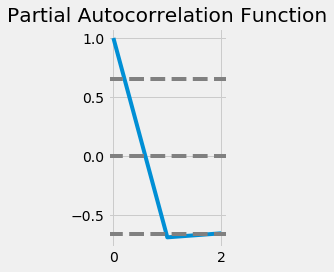

In [1047]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [1048]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log_diff2, order=(1, 2, 1))
model_fit = model.fit(disp=False)

In [1049]:
ts_log_diff2.tail(2)

TransactionDate
2019-04-30   -0.723816
2019-05-31   -2.381764
Freq: M, Name: Amount, dtype: float64

In [1050]:
pred_arima= model_fit.predict(start="2019-05-31",end="2019-12-31")
predictions_ARIMA_diff = pd.Series(pred_arima, copy=True)
predictions_ARIMA_diff_cumsum1 = predictions_ARIMA_diff.cumsum()
a=ts_log_diff1[-1]
predicted_log_1=a+predictions_ARIMA_diff_cumsum1
b=ts_log[-1]
predicted_log=b+predicted_log_1

In [1051]:
prediction_final=np.exp(predicted_log)

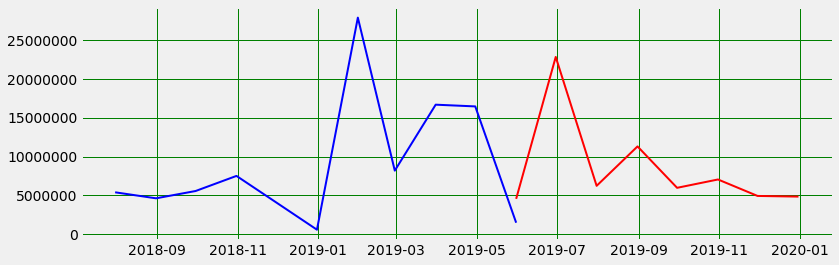

In [1052]:
plt.figure(figsize=(12,4))
plt.plot(ts, color="blue", linewidth=2)
plt.plot(prediction_final,color="red", linewidth=2)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")

**FORECAST WITH INTERPOLATION**

In [1004]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")

**INTERPOLATION STEPS**

In [1005]:
payment=payment.interpolate(method="linear", limit_direction="backward")

In [1006]:
payment.head(3)

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount
0,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,74970.0
1,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,109841.0
2,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,51128.0


In [1007]:
sel=payment[payment.SellerId==6][["TransactionDate","Amount"]]
sel["TransactionDate"]=sel.TransactionDate.apply(lambda x: x.split("T")[0])
sel["TransactionDate"]=pd.to_datetime(sel.TransactionDate)
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

In [1008]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [1009]:
dft(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.141058
p-value                        0.698424
#Lags Used                     1.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [1010]:
ts_log=np.log(ts[ts>0])

In [1011]:
ts_log_diff1=ts_log-ts_log.shift()

In [1012]:
ts_log_diff1.dropna(inplace=True)

In [1013]:
dft(ts_log_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      6.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [1014]:
ts_log_diff2=ts_log_diff1-ts_log_diff1.shift()

In [1015]:
ts_log_diff2.dropna(inplace=True)

In [1016]:
dft(ts_log_diff2)

Results of Dickey-Fuller Test:
Test Statistic                -6.080426e+00
p-value                        1.095570e-07
#Lags Used                     0.000000e+00
Number of Observations Used    8.000000e+00
Critical Value (1%)           -4.665186e+00
Critical Value (5%)           -3.367187e+00
Critical Value (10%)          -2.802961e+00
dtype: float64


In [1017]:
ts_log_diff2.dropna(inplace=True)

In [1018]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [1019]:
lag_acf = acf(ts_log_diff2, nlags=2)
lag_pacf = pacf(ts_log_diff2, nlags=2, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

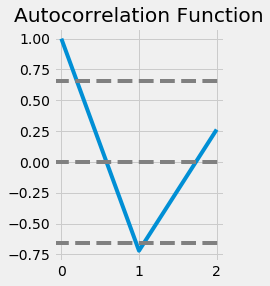

In [1020]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

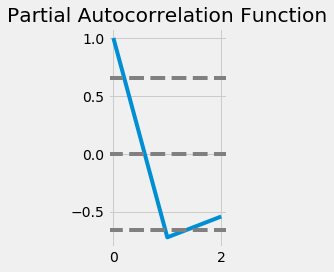

In [1021]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [1022]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log_diff2, order=(1, 2, 1))
model_fit = model.fit(disp=False)

In [1023]:
pred_arima= model_fit.predict(start="2019-05-31",end="2019-12-31")
predictions_ARIMA_diff = pd.Series(pred_arima, copy=True)
predictions_ARIMA_diff_cumsum1 = predictions_ARIMA_diff.cumsum()
a=ts_log_diff1[-1]
predicted_log_1=a+predictions_ARIMA_diff_cumsum
b=ts_log[-1]
predicted_log=b+predicted_log_1

In [1024]:
prediction_final=np.exp(predicted_log)

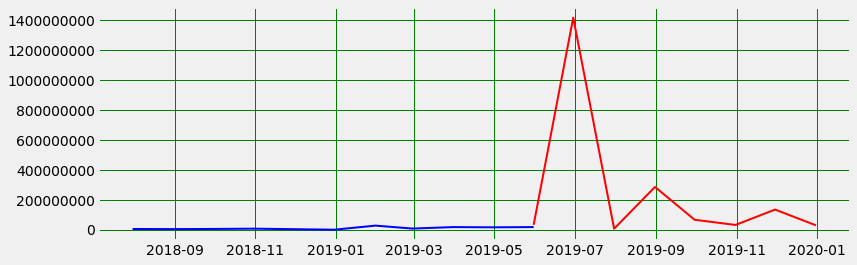

In [1025]:
plt.figure(figsize=(12,4))
plt.plot(ts, color="blue", linewidth=2)
plt.plot(prediction_final,color="red", linewidth=2)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")